Importing Modules 


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 6]
sns.color_palette("magma")
sns.set()

Loading data 

In [2]:
df = pd.read_csv('wholesale-customers-data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


Data Exploraion 

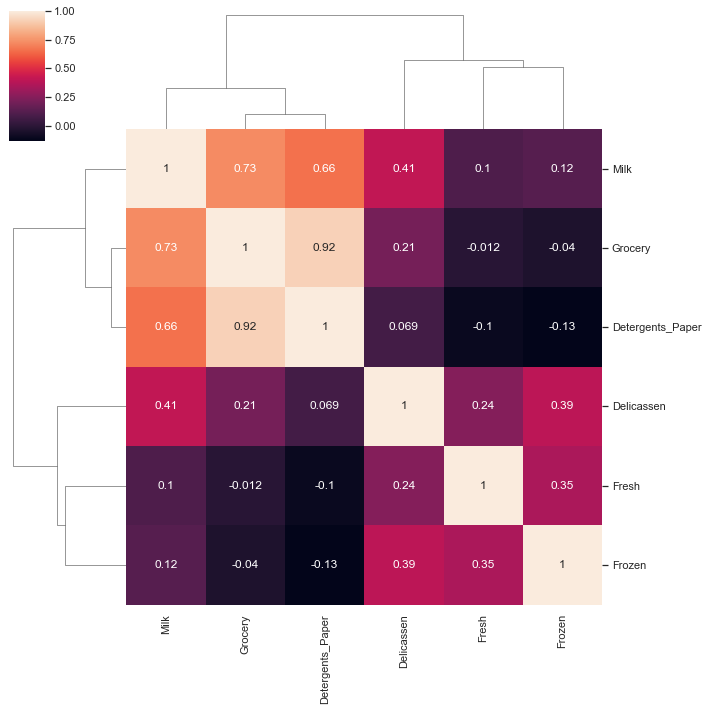

In [3]:
sns.clustermap(df.drop(['Channel','Region'],axis=1).corr(),annot=True)

<AxesSubplot:xlabel='Detergents_Paper', ylabel='Grocery'>

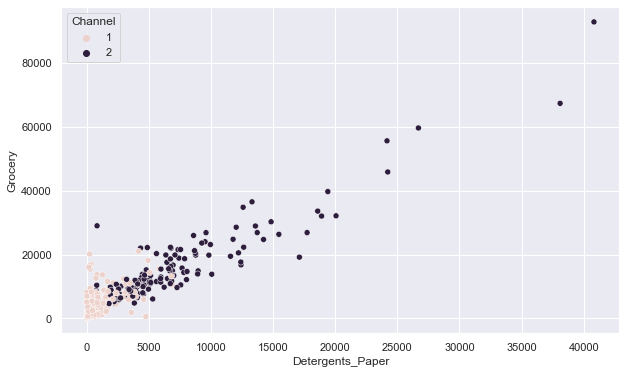

In [4]:
sns.scatterplot(data=df,x='Detergents_Paper',y='Grocery',hue='Channel')

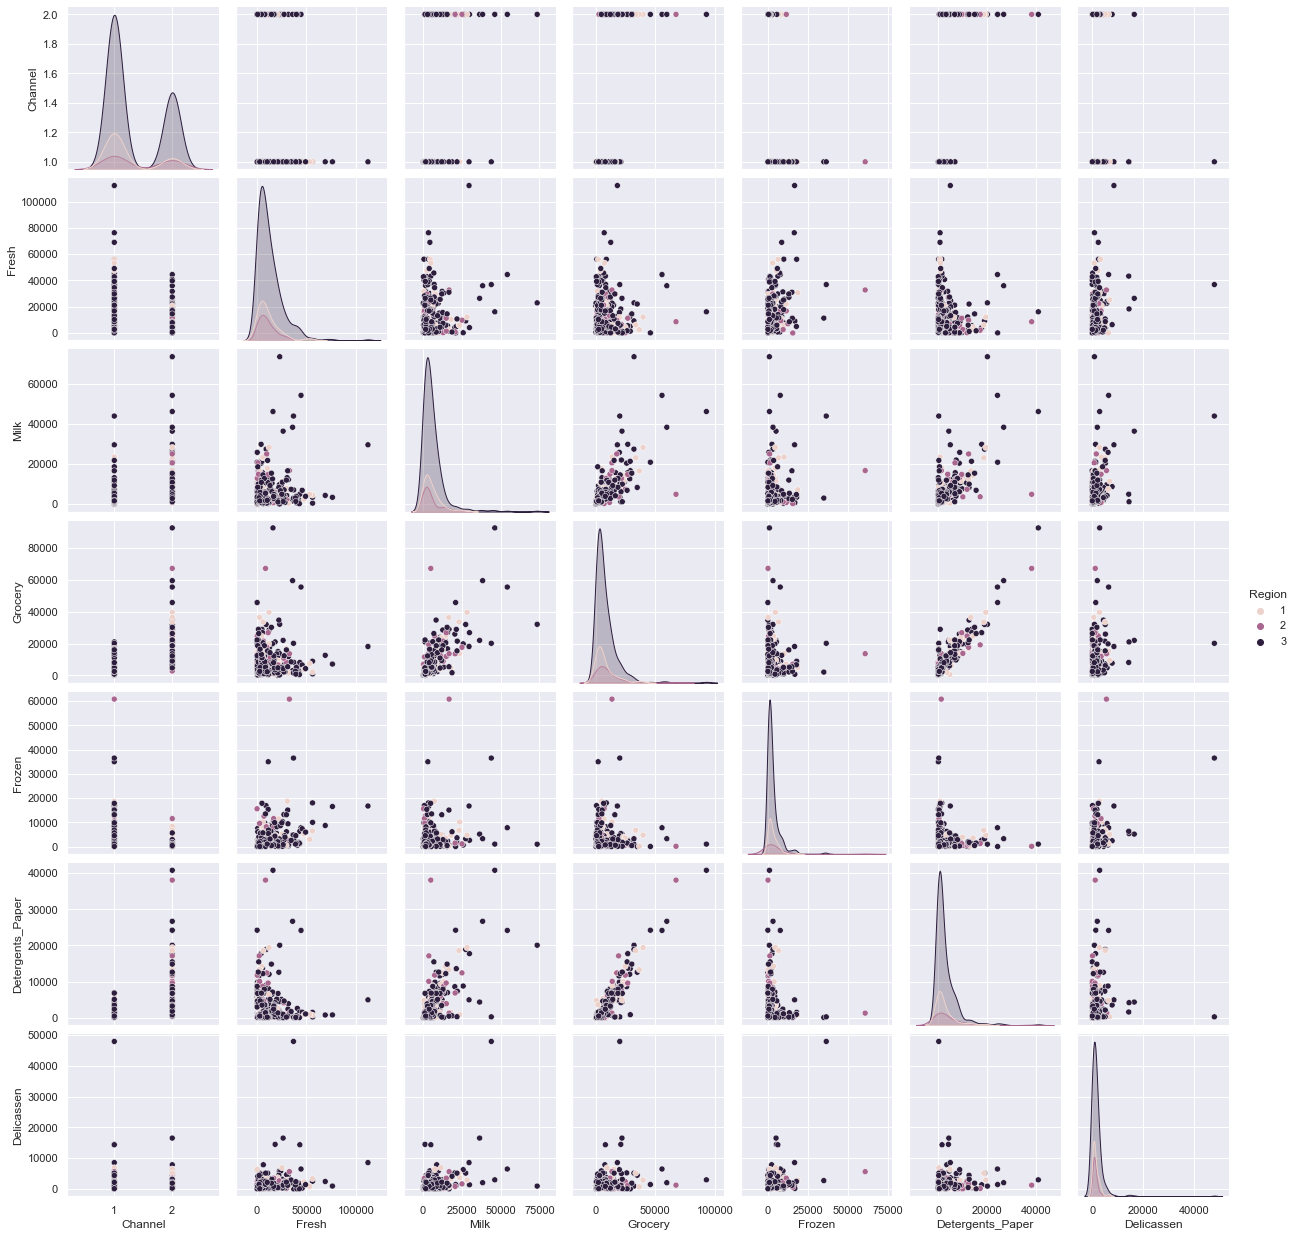

In [5]:
sns.pairplot(df,hue='Region')

Data Extraction

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
sc = StandardScaler()

In [8]:
scaled_X = sc.fit_transform(df)

In [9]:
scaled_X

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

Model clustering

In [10]:
from sklearn.cluster import DBSCAN

In [11]:
db = DBSCAN()

In [12]:
outlier = []
for i in np.linspace(0.001,3,50):
    db = DBSCAN(eps=i)
    db.fit(scaled_X)
    outlier_percent = 100 * np.sum(db.labels_ == -1) / len(db.labels_)
    outlier.append(outlier_percent)

Text(0, 0.5, 'Outlier percentage')

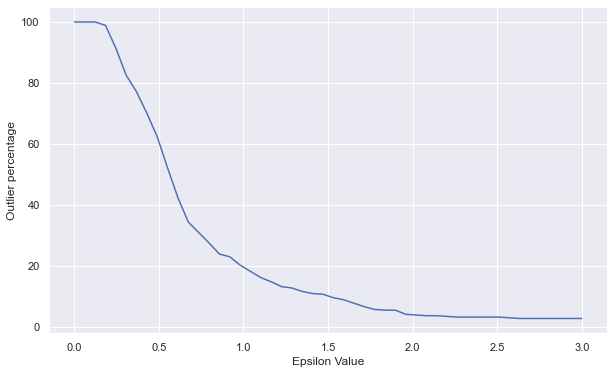

In [13]:
sns.lineplot(x=np.linspace(0.001,3,50),y=outlier)
plt.xlabel('Epsilon Value')
plt.ylabel('Outlier percentage')

In [14]:
db = DBSCAN(eps=2)

In [15]:
db.labels_

AttributeError: 'DBSCAN' object has no attribute 'labels_'

In [ ]:
sns.scatterplot(data=df,x='Detergents_Paper',y='Grocery',hue=db.labels_)